In [2]:
import numpy as np
import sympy as sm
import scipy as sp

#For Plotting and prettyness
import matplotlib.pyplot as plt
from matplotlib import colors as color
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
x1, x2 = sm.symbols('x1 x2')

class func(sm.Function):
    @classmethod
    def eval(cls, x1, x2):
        
        res = (1/10) * (12 + x1**2 + (1 + x2**2)/x1**2 + (x1**2 * x2**2 + 100) / (x1**4 * x2**4) )
        return res
    
#Computing function, gradient and hessian in sympy
f = func(x1, x2)
g = [sm.diff(f, k) for k in [x1, x2]]
H = sm.hessian(f, (x1, x2))


In [4]:
def newtonseq(x0, k, stepsize) : 

    def fentonfgH(x_eval) :        
        f_eval = f.subs([(x1, x_eval[0]), (x2, x_eval[1])]) 
        g_eval = [g[i].subs([(x1, x_eval[0]), (x2, x_eval[1])]) for i in range(len(g))] 
        H_eval = H.subs([(x1, x_eval[0]), (x2, x_eval[1])])

        return np.array(f_eval).astype(np.float64), np.array(g_eval).astype(np.float64), np.array(H_eval).astype(np.float64)

    newtonseq = np.zeros((k, 2))
    newtonseq[0, :] = x0

    for i in range(0, k - 1):
        _, g_step, H_step = fentonfgH(newtonseq[i, :])
        
        #Computing QR of H_step for inverse 
        H_Q, H_R = np.linalg.qr(H_step)

        #Solving QRx = b => Rx = Q^T b
        b = H_Q.T @ g_step
        x = sp.linalg.solve_triangular(H_R, b)

        newtonseq[i+1, :] = newtonseq[i, :] - stepsize * x.T
    
    return newtonseq



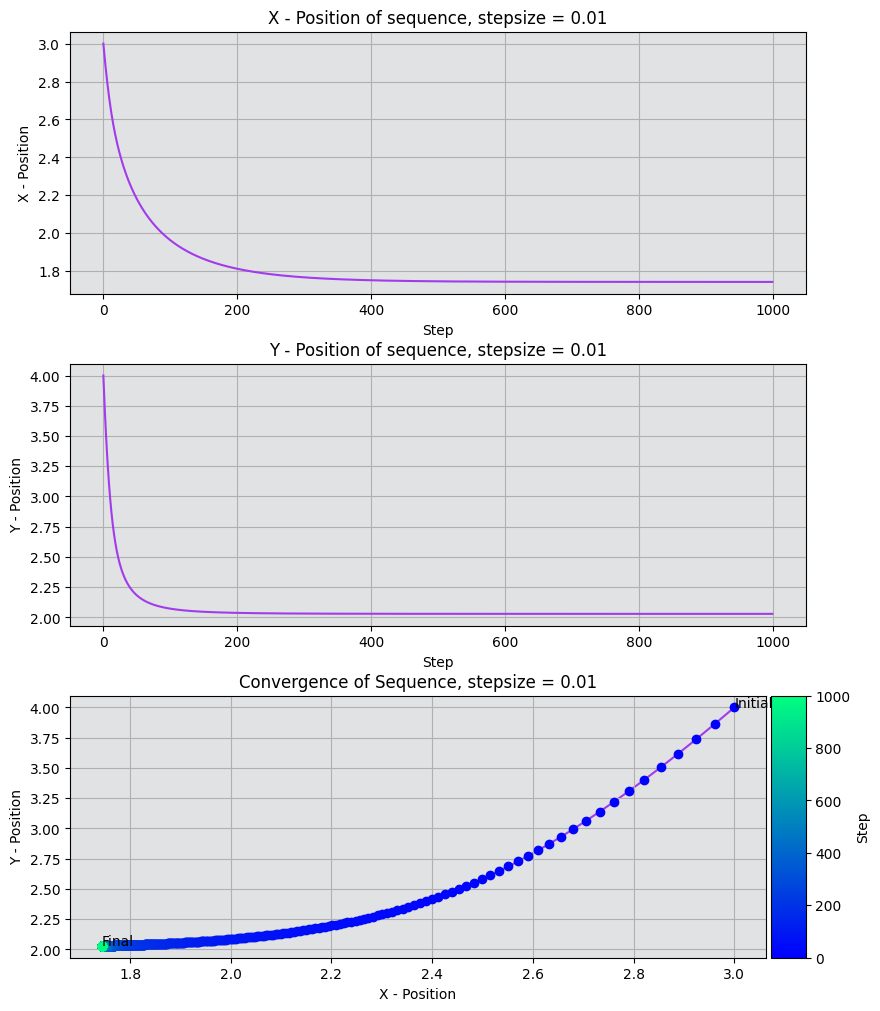

In [8]:
stepsize = 0.01
xk = newtonseq([3, 4], 1000, stepsize)
fig, axs = plt.subplots(3, 1, figsize = (8, 10))

#I wanted a color gradient that goes between two dark colors.
#winter was the only one I could find.
cm = matplotlib.colormaps['winter']
norm = color.Normalize(vmin=0, vmax=len(xk[:, 1]))

titles = ['X', 'Y']
for i in [0, 1, 2]:
    if i != 2:        
        axs[i].plot(xk[:, i], c = "#A23BEC")
        axs[i].set_xlabel("Step")
        axs[i].set_ylabel(f'{titles[i]} - Position')
        axs[i].set_title(f'{titles[i]} - Position of sequence, stepsize = {stepsize}')
    else :
        
        for j in range(len(xk[:, 0])):
            axs[i].scatter(xk[j, 0], xk[j, 1], c=[cm(norm(j))], zorder = 2)
        axs[i].plot(xk[:, 0], xk[:, 1], c="#A23BEC", linewidth=1.5, zorder = 1)
        axs[i].set_title(f'Convergence of Sequence, stepsize = {stepsize}')
        axs[i].set_xlabel("X - Position")
        axs[i].set_ylabel("Y - Position")
        axs[i].annotate('Initial', xy = (xk[0, 0], xk[0, 1]))
        axs[i].annotate('Final', xy = (xk[-1, 0], xk[-1, 1]))

    axs[i].set_facecolor("#e1e2e3")
    axs[i].grid(True)


divider = make_axes_locatable(axs[-1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.tight_layout(pad = 0.3)
fig.colorbar(plt.cm.ScalarMappable(norm = norm, cmap = cm), ax = axs[-1], label = 'Step', cax=cax)

